# Дифференцирование

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html#matplotlib.pyplot.axhline
* https://numpy.org/doc/stable/reference/generated/numpy.log1p.html#numpy.log1p
* https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html
* https://en.wikipedia.org/wiki/Finite_difference
* https://pythonnumericalmethods.berkeley.edu/notebooks/chapter20.02-Finite-Difference-Approximating-Derivatives.html
* https://en.wikipedia.org/wiki/Gradient_descent
* https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
* https://zhang-yang.medium.com/the-gradient-argument-in-pytorchs-backward-function-explained-by-examples-68f266950c29

## Задачи для совместного разбора

In [33]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

1\. Дана функция $f(x) = x^2$. Найдите производную этой функции различными способами

In [ ]:
def f(x):
  return x ** 2

In [ ]:
def dfdx(x):
  return 2 * x

In [ ]:
import torch as th

In [ ]:
x = th.tensor([0, 1, 2])
f(x)

tensor([0, 1, 4])

In [ ]:
dfdx(x)

tensor([0, 2, 4])

In [1]:
import sympy

In [ ]:
x = sympy.symbols("x")
f = x ** 2
dfdx = sympy.diff(f, x)
dfdx

2*x

In [ ]:
dfdx.evalf(subs={x: 1})

2.00000000000000

In [ ]:
def f(x):
  return x ** 2

In [ ]:
def dfdx(f, x, h=1e-5):
  return (f(x+h) - f(x)) / h

In [ ]:
dfdx(f, 1)

2.00001000001393

In [ ]:
x = th.linspace(0, 9, steps=3, requires_grad=True)
y = f(x)
z = y.sum() # x1^2 + x2^2 + x^3
z.backward() # dz/dx
x, x.grad

(tensor([0.0000, 4.5000, 9.0000], requires_grad=True), tensor([ 0.,  9., 18.]))

In [ ]:
x = th.linspace(0, 9, steps=3, requires_grad=True)
y = f(x)
# z = y1+y2+y3
dzdy = th.ones(3)

# y.backward(gradient=dzdy)
y.backward(gradient=th.tensor([1, 2, 3]))
x.grad

tensor([ 0., 18., 54.])

In [ ]:
x1, x2, x3 = x
J = th.tensor([
  [2*x1, 0, 0],
  [0, 2*x2, 0],
  [0, 0, 2*x3]
])
J @ dzdy

tensor([ 0.,  9., 18.])

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Дана функция $f(x)$. Найдите (аналитически) производную данной функции $f'(x)$ и реализуйте две этих функции. Постройте в одной системе координат графики $f(x)$, $f'(x)$ и $g(x) = 0$ на полуинтервале (0, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [7]:
x = sp.symbols("x")

In [8]:
g = 0

In [55]:
dfdx = sp.cos(x)/(sp.log(x) + 1) - sp.sin(x)/x*(sp.log(x) + 1)**2

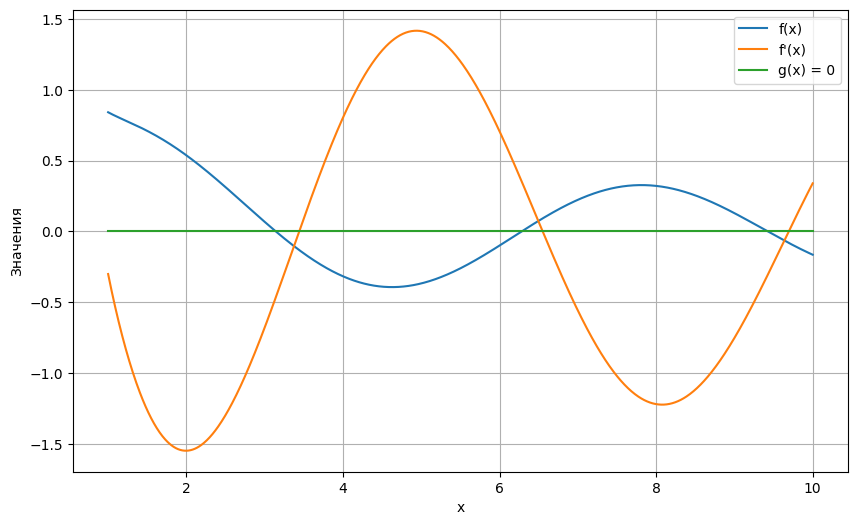

In [76]:
x_values = np.linspace(1, 10, 1000)

f = np.sin(x_values) / (np.log(x_values) + 1)
dfdx = np.cos(x_values) / (np.log(x_values) + 1) - np.sin(x_values) / x_values * (np.log(x_values) + 1)**2

g = np.zeros_like(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, f, label='f(x)')
plt.plot(x_values, dfdx, label="f'(x)")
plt.plot(x_values, g, label='g(x) = 0')
plt.xlabel('x')
plt.ylabel('Значения')
plt.grid(True)
plt.legend()
plt.show()


<p class="task" id="2"></p>

2\. Дана функция $f(x)$. Найдите (используя символьные вычисления) производную данной функции $f'(x)$. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$ на полуинтервале (0, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [77]:
x = sp.symbols("x")
f = sp.sin(x) / (sp.log(x) + 1)
dfdx = sp.diff(f, x)
dfdx

cos(x)/(log(x) + 1) - sin(x)/(x*(log(x) + 1)**2)

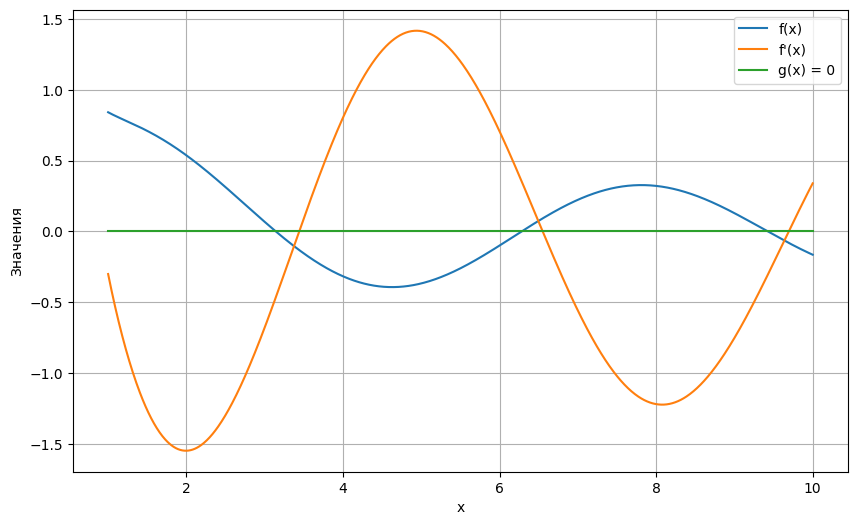

In [78]:
import numpy as np
import matplotlib.pyplot as plt

x_values = np.linspace(1, 10, 1000)

f = np.sin(x_values) / (np.log(x_values) + 1)
dfdx = np.cos(x_values) / (np.log(x_values) + 1) - np.sin(x_values) / x_values * (np.log(x_values) + 1)**2

g = np.zeros_like(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, f, label='f(x)')
plt.plot(x_values, dfdx, label="f'(x)")
plt.plot(x_values, g, label='g(x) = 0')
plt.xlabel('x')
plt.ylabel('Значения')
plt.grid(True)
plt.legend()
plt.show()

<p class="task" id="3"></p>

3\. Дана функция $f(x)$. Найдите (численно) производную данной функции $f'(x)$ на полуинтервале (0, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [87]:
def f(x):
    return np.sin(x) / (np.log(x) + 1)

def dfdx(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h

In [88]:
x_values = np.linspace(0,10,1000)
solve_f = f(x_values)
solve_dfdx = dfdx(f, x_values)
g = np.zeros_like(x_values)

<ipython-input-87-15cd7c959226>:2: RuntimeWarning: divide by zero encountered in log
  return np.sin(x) / (np.log(x) + 1)


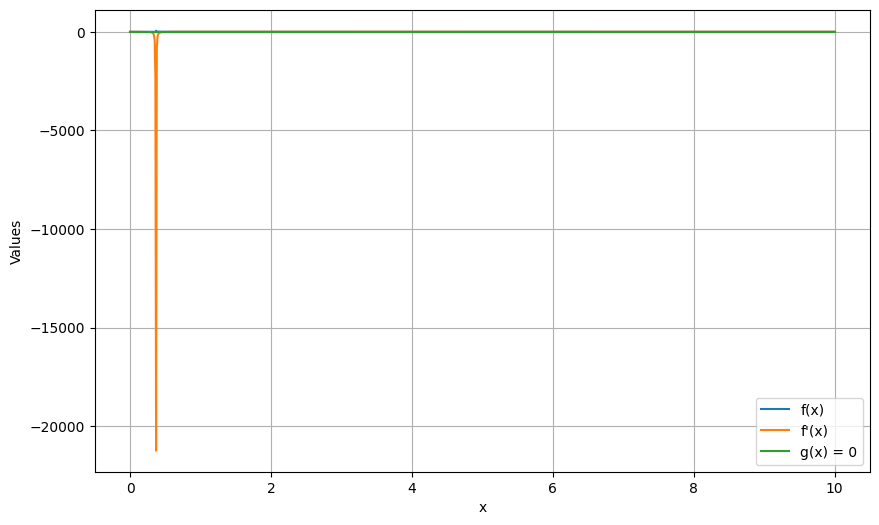

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(x_values, solve_f, label='f(x)')
plt.plot(x_values, solve_dfdx, label="f'(x)")
plt.plot(x_values, g, label='g(x) = 0')
plt.xlabel('x')
plt.ylabel('Values')
plt.grid(True)
plt.legend()
plt.show()

<p class="task" id="4"></p>

4\. Найдите локальный минимум функции $f(x)$ при помощи метода градиетного спуска. В качестве начальной точки используйте $x_0 = 4$. Найдите локальный максимум этой же функции, используя в качестве начальной точки $x_0'=9$.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [92]:
import torch as th

def func(x):
    return th.sin(th.log(x)+1)

x0_min = th.tensor([4.0], requires_grad=True)
alpha = 0.01
eps = 1e-6
fl = True

while fl:
    cur = x0_min.item()
    f_val = func(x0_min)
    f_val.backward()
    x0_min.data = x0_min - alpha * x0_min.grad
    x0_min.grad.zero_()  # Сброс градиента для следующей итерации
    fl = abs(cur - x0_min.item()) > eps

x0_min.item()

40.63534164428711

<p class="task" id="5"></p>

5\. Дана функция $f(x)$. Найдите (используя возможности по автоматическому дифференцированию пакета `torch`) производную данной функции $f'(x)$ на отрезке [0, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$ на полуинтервале (0, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [82]:
import torch as th

In [83]:
def f(x):
    return th.sin(x) / (th.log(x) + 1)

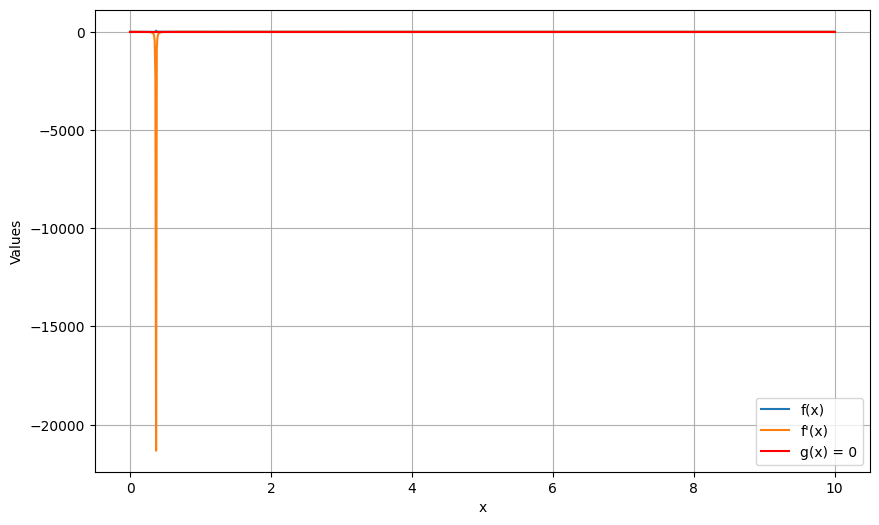

In [85]:
x_values = th.linspace(0, 10, 1000, requires_grad=True)
dfdx5 = f(x_values)
dfdx5.backward(th.ones_like(x_values))
ys = x_values.grad

plt.figure(figsize=(10, 6))
plt.plot(x_values.detach().numpy(), f(x_values).detach().numpy(), label='f(x)') #извлекает значения из тензора
plt.plot(x_values.detach().numpy(), ys.detach().numpy(), label="f'(x)")
plt.plot([0, 10], [0, 0], c='r', label='g(x) = 0')
plt.xlabel('x')
plt.ylabel('Values')
plt.grid(True)
plt.legend()
plt.show()


<p class="task" id="6"></p>

6\. Дана функция $f(x)$. Найдите производную данной функции $f'(x)$ на отрезке [0, 10] при помощи формулы производной сложной функции. На этом же отрезке найдите, используя возможности по автоматическому дифференцированию пакета `torch`. Сравните результаты.

$$f(x) = sin(cos(x))$$

In [65]:
x_values = np.linspace(0,10,1000)
dfdx = -np.sin(x_values)*np.cos(np.cos(x_values))

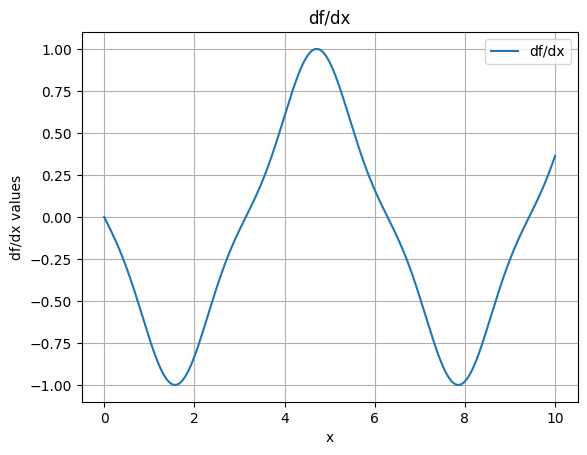

In [66]:
plt.plot(x_values, dfdx, label="df/dx")
plt.xlabel('x')
plt.ylabel("df/dx values")
plt.title("df/dx")
plt.grid(True)
plt.legend()
plt.show()

In [67]:
def func(x):
  return th.sin(th.cos(x))

x_values = th.linspace(0,10,500,requires_grad=True)
dfdx = func(x_values)
dfdx.backward(th.ones_like(x_values))
ys = x_values.grad

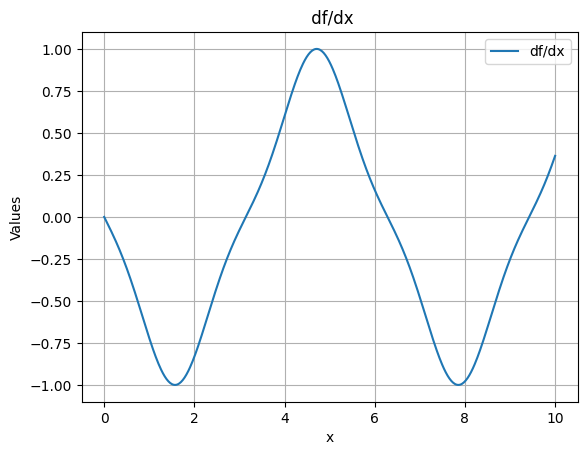

In [68]:
plt.plot(x_values.detach().numpy(), ys.detach().numpy(), label="df/dx")
plt.xlabel('x')
plt.ylabel('Values')
plt.title(" df/dx")
plt.grid(True)
plt.legend()
plt.show()

## Обратная связь
- [ ] Хочу получить обратную связь по решению